In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df_B2_13 = pd.read_csv("../results/20240516-19.46.28_B2-long/logs/explain/20240516-19.46.28_B2-long_episodes.csv", header=None)
# add column names
df_B2_13.columns =['timestamp', 'name', 'seed', 'total_steps', 'episode', 'episode_steps', 'reward', 'distance', 'velocity', 'game_time', 'game_score', 'flag', 'loss', 'epsilon', 'dataset']
df_B2_13['ewm_reward'] = df_B2_13['reward'].ewm(alpha=0.0001).mean()
df_B2_13['ewm_wins'] = df_B2_13['flag'].ewm(alpha=0.0001).mean()
df_B2_13.head(5)

,timestamp,name,seed,total_steps,episode,episode_steps,reward,distance,velocity,game_time,game_score,flag,loss,epsilon,dataset,ewm_reward,ewm_wins
0,2024-05-16 19:46:29.997,game_episodes,13,102,1,102,598.0,675,33.750000,380,0,False,3.954245,0.999661,B2-long,598.000000,0.0
1,2024-05-16 19:46:39.628,game_episodes,13,1135,2,1033,637.0,898,4.359223,194,200,False,0.394172,0.995642,B2-long,617.500975,0.0
2,2024-05-16 19:46:46.028,game_episodes,13,1851,3,716,1233.0,1434,10.027972,257,900,False,1.040487,0.992865,B2-long,822.687835,0.0
3,2024-05-16 19:46:53.453,game_episodes,13,2633,4,782,936.0,1150,7.371795,244,600,False,0.288787,0.989842,B2-long,851.020126,0.0
4,2024-05-16 19:46:54.214,game_episodes,13,2715,5,82,612.0,686,42.875000,384,0,False,0.584212,0.989525,B2-long,803.206539,0.0


In [7]:
df_B2_42 = pd.read_csv("../results/20240602-22.32.40_B2-42/explain/20240602-22.32.40_B2-long_episodes.csv", header=None)
# add column names
df_B2_42.columns =['timestamp', 'name', 'seed', 'total_steps', 'episode', 'episode_steps', 'reward', 'distance', 'velocity', 'game_time', 'game_score', 'flag', 'loss', 'epsilon', 'dataset']
df_B2_42['ewm_reward'] = df_B2_42['reward'].ewm(alpha=0.0001).mean()
df_B2_42['ewm_wins'] = df_B2_42['flag'].ewm(alpha=0.0001).mean()
df_B2_42.head(5)

,timestamp,name,seed,total_steps,episode,episode_steps,reward,distance,velocity,game_time,game_score,flag,loss,epsilon,dataset,ewm_reward,ewm_wins
0,2024-06-02 22:32:46.089,game_episodes,42,455,1,455,711.0,859,9.544444,310,200,False,1.564319,0.998285,B2-42,711.000000,0.0
1,2024-06-02 22:32:46.384,game_episodes,42,488,2,33,243.0,307,51.166667,394,200,False,2.069469,0.998157,B2-42,476.988299,0.0
2,2024-06-02 22:32:46.728,game_episodes,42,526,3,38,229.0,293,41.857143,393,200,False,1.060860,0.998009,B2-42,394.317266,0.0
3,2024-06-02 22:32:47.047,game_episodes,42,562,4,36,245.0,309,44.142857,393,0,False,1.705705,0.997869,B2-42,356.982350,0.0
4,2024-06-02 22:32:54.787,game_episodes,42,1439,5,877,897.0,1127,6.440000,225,300,False,0.413309,0.994462,B2-42,465.007483,0.0


In [8]:
concatenated = pd.concat([df_B2_13, df_B2_42])

[Text(0.5, 0, 'Episodes trained'), Text(0, 0.5, 'EWM wins (alpha=0.0001)')]

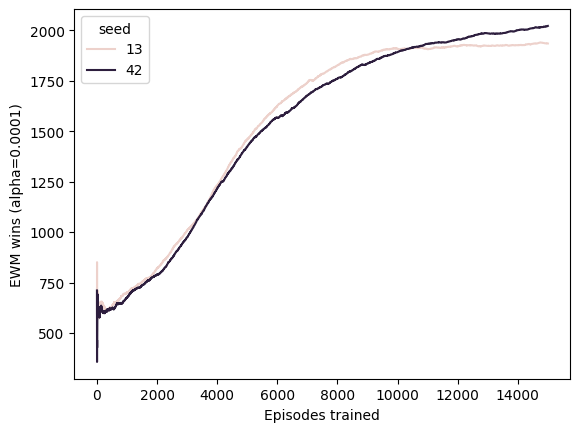

In [9]:
sns.lineplot(x='episode', y='ewm_reward', data=concatenated, hue='seed').set(xlabel="Episodes trained", ylabel="EWM rewards (alpha=0.0001)")

[Text(0.5, 0, 'Episodes trained'), Text(0, 0.5, 'EWM wins (alpha=0.0001)')]

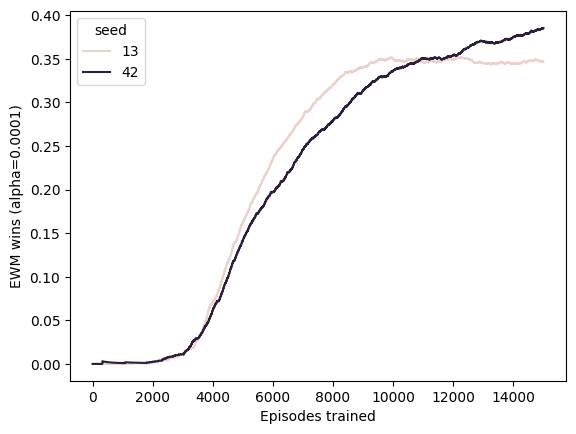

In [10]:
sns.lineplot(x='episode', y='ewm_wins', data=concatenated, hue='seed').set(xlabel="Episodes trained", ylabel="EWM wins (alpha=0.0001)")